In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import pandas as pd
import pickle
import ast
import json


Carreguem dades

In [2]:
casos_pkl = pd.read_pickle('data/usuaris.pkl')
casos_pkl=pd.read_pickle('eoo/casos.pkl')

In [3]:
#obtenim vectors
#vectors = [cas.vector for cas in casos_pkl]
vectors = list(casos_pkl.vector)

In [4]:
vectors

[array([-1.    , -1.    , -1.    , -1.    , -1.    ,  1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -0.0857, -0.0857, -0.8286,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ,
        -1.    , -1.    , -1.    ,  1.    , -1.    ,  0.2   , -0.2   ,
        -1.    , -1.    , -1.    , -1.    ,  0.0286, -1.    , -0.0286,
        -0.8286,  0.8286,  0.0857, -1.    , -0.0857, -1.    ,  1.    ,
        -0.6571, -1.    ,  0.6571, -0.3143,  0.3143, -1.    ,  0.2783,
        -0.2869]),
 array([-0.9091, -0.9091, -0.9091, -0.9091, -0.9091,  1.    , -0.9091,
        -0.9091, -0.9091, -0.9091, -0.9091, -0.9091, -0.90

### Cluster aglomeratiu

Veiem la distribució de les dades en un cluster aglomeratiu

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


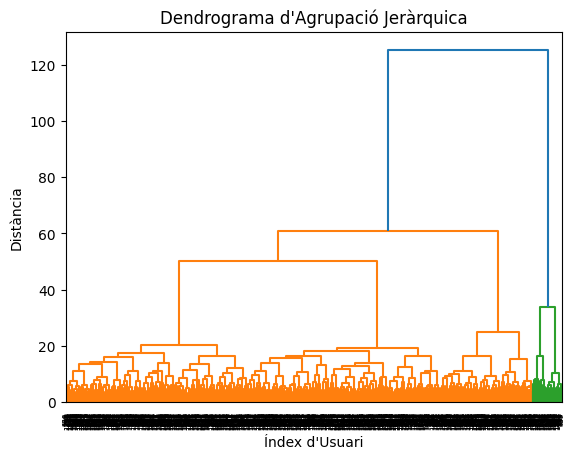

In [5]:
# Calcular la matriu de distàncies
distàncies = pdist(vectors, metric='euclidean')

# Convertir la matriu de distàncies a una matriu quadrada
matriu_distàncies = squareform(distàncies)

# Aplicar l'algoritme d'Agrupació Jeràrquica
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # Trieu el llindar de distància adequat
etiquetes = model.fit_predict(matriu_distàncies)

# Visualitzar el dendrograma
enllaços = linkage(distàncies, method='ward')
dendrogram(enllaços, labels=range(len(vectors)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma d\'Agrupació Jeràrquica')
plt.xlabel("Índex d'Usuari")
plt.ylabel('Distància')
plt.show()

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sk

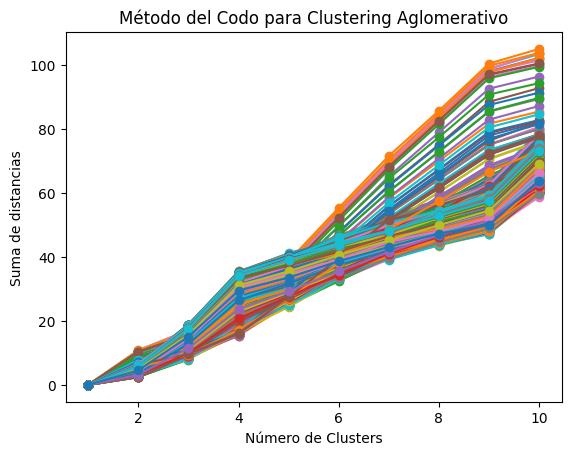

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(vectors, metric='euclidean')

# Método del codo para clustering aglomerativo
wcss = []
for i in range(1, 11):
    model = AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage='average')
    labels = model.fit_predict(matriu_distàncies)
    wcss.append(sum(np.min(matriu_distàncies[:, labels == j], axis=1) for j in range(i)))

# Graficar la curva del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para Clustering Aglomerativo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de distancias')
plt.show()


In [7]:
#decidim el nombre òptim de clusters
model_clustering = AgglomerativeClustering(n_clusters=4)
clusters = model_clustering.fit_predict(vectors)
#casos['cluster'] = clusters

In [8]:
#guardem el model per predir posteriorment
with open('model_clustering.pkl', 'wb') as archivo:
    pickle.dump(model_clustering, archivo)

### Provem kmeans

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

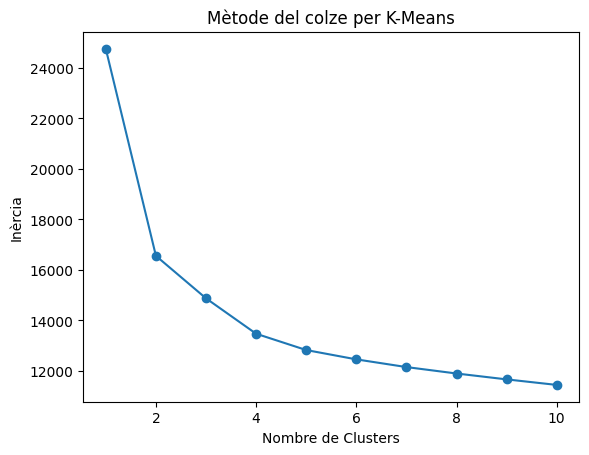

In [9]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(vectors)
    wcss.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Mètode del colze per K-Means')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inèrcia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters=kmeans.fit(vectors)

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
'''data_dict = {atributo: [] for atributo in dir(casos_pkl[0]) if not callable(getattr(casos_pkl[0], atributo)) and not atributo.startswith("__")}

for instancia in casos_pkl:
    for atributo, valor in instancia.__dict__.items():
        data_dict[atributo].append(valor)

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data_dict)
df['cluster']=clusters.labels_'''

'data_dict = {atributo: [] for atributo in dir(casos_pkl[0]) if not callable(getattr(casos_pkl[0], atributo)) and not atributo.startswith("__")}\n\nfor instancia in casos_pkl:\n    for atributo, valor in instancia.__dict__.items():\n        data_dict[atributo].append(valor)\n\n# Crear un DataFrame a partir del diccionario\ndf = pd.DataFrame(data_dict)\ndf[\'cluster\']=clusters.labels_'

In [13]:
casos_pkl['cluster']=clusters.labels_

In [14]:
with open('model_clustering_kmeans.pkl', 'wb') as archivo:
    pickle.dump(kmeans, archivo)

In [30]:
df.to_csv('data/usuaris.csv')

In [15]:
casos_pkl.to_pickle('casos_cluster.pkl')